In [4]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=2)
dut.connect(ser)

In [6]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


In [5]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

Setting vrefs to default
DAC initialized to a span from -10 V to 10 V


In [3]:
dut.disconnect()

In [26]:
dut.ground_PIC()
dut.power_off()
dut.disconnect()

DAC initialized to a span from -10 V to 10 V


In [17]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 30e-6
targetTolerance = 4e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))


Success! Array 1 , device (row= 13 col= 9 ) Init G= 4.354394383719896e-05  Final G= 3.147605083088954e-05 Err= 1.4760508308895403e-06


In [35]:
arr = 1
rr = 13
cc = 9

Vgate = 5

targetG = 100e-6
targetTolerance = 10e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Success! Array 1 , device (row= 13 col= 9 ) Init G= 0.0001703052025632671  Final G= 0.00010948191593352881 Err= 9.48191593352881e-06


199.3123812675476


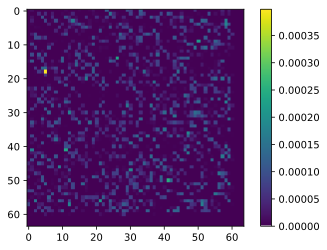

In [7]:
arr = 0
numRows = 64
numCols = 64
Gmap0 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0)
plt.colorbar()

848.6342351436615


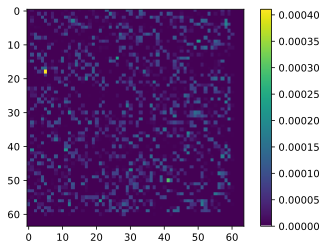

In [8]:
arr = 0
numRows = 64
numCols = 64
Gmap0slow = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0slow[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0slow)
plt.colorbar()

843.420793056488


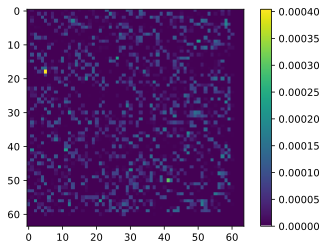

In [10]:
arr = 0
numRows = 64
numCols = 64
Gmap0slow2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0slow2[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0slow2)
plt.colorbar()

240.3656280040741
247.19598579406738


Text(0.5, 1.0, 'Array 2')

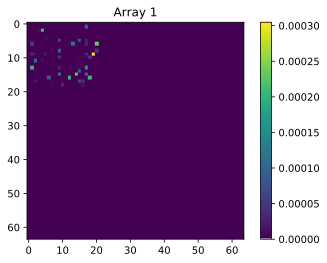

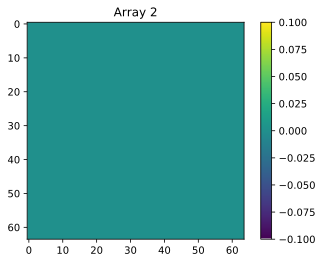

In [24]:
arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1[rr,cc] = rdCurr/vRead
print(time.time()-ts)
ax,fig = plt.subplots()
plt.imshow(Gmap1)
plt.colorbar()
plt.title('Array 1')

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            #rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap2[rr,cc] = rdCurr/vRead
print(time.time()-ts)
ax,fig = plt.subplots()
plt.imshow(Gmap2)
plt.colorbar()
plt.title('Array 2')

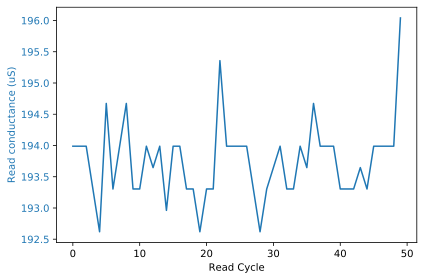

In [16]:
arr=2
rr=0
cc=1

Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 50
vRead = 0.05

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.01)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

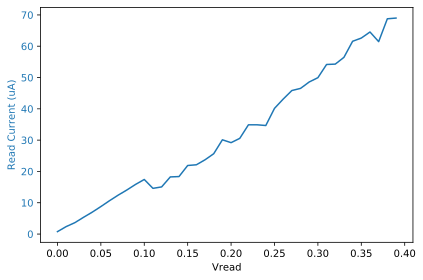

In [13]:
arr=2
rr=0
cc=1

Vreads = np.arange(0, 0.4, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [29]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.05)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))


Device (row= 0 col= 1 ) switched ON at V= 3.099999999999999
Device (row= 0 col= 1 ) switched ON at Vgate= 1.0999999999999999
Device (row= 0 col= 1 ) switched OFF at V= 0.8000000000000003
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 1 ) switched ON at V= 3.4499999999999993
Device (row= 0 col= 1 ) switched ON at Vgate= 1.1999999999999997
Device (row= 0 col= 1 ) switched OFF at V= 1.2000000000000004
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 0.0 Err= -1e-05


In [8]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 1

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Device (row= 0 col= 1 ) switched ON at V= 3.000000000000001
Device (row= 0 col= 1 ) switched ON at Vgate= 0.9999999999999999
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 9.123492994460735e-05 Err= 8.123492994460735e-05


In [17]:
arr = 2
rr = 0
cc = 1

Vgate = 5

targetG = 10e-6
targetTolerance = 2e-6

vSetRamp = np.arange(0.3, 3.5, 0.1)
vGateSetRamp = np.arange(0.6, 1.4, 0.1)
vResetRamp = np.arange(0.3, 3.5, 0.05)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 1

initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
#finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
finalG = a0.cell_program_with_fb(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Device (row= 0 col= 1 ) switched OFF at V= 1.0999999999999999
Device (row= 0 col= 1 ) switched OFF at Vgate= 5.0
Fail! Array 2 , device (row= 0 col= 1 ) Init G= 0.00018132942326490713  Final G= 7.903225806451612e-06 Err= -2.0967741935483893e-06
